<a href="https://colab.research.google.com/github/HoanDiep/Tuan5/blob/main/tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7759465860299606092d53311ed3ff08de04a94cb266bb46d8eb44d7b94d32a0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

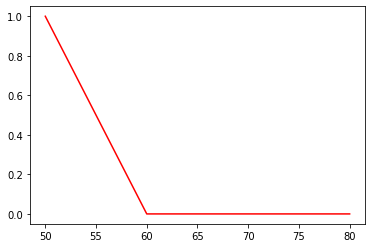

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'slow')
plt.plot

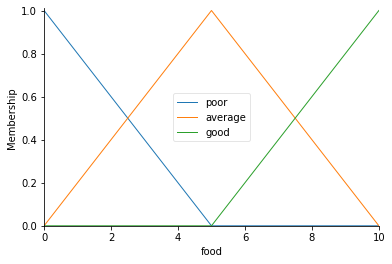

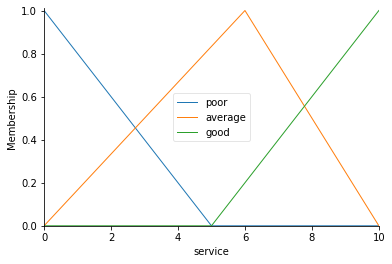

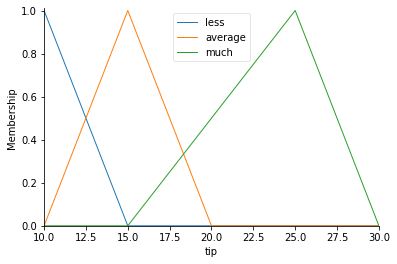

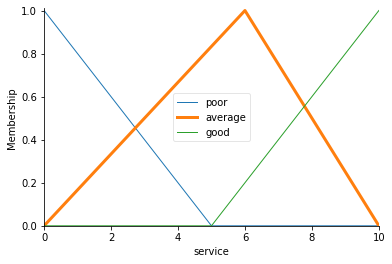

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip= ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,6,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,15])
tip['average']=fuzz.trimf(tip.universe,[10,15,20])
tip['much']=fuzz.trimf(tip.universe,[15,25,30])

food.view()
service.view()
tip.view()

service['average'].view()

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule6=ctrl.Rule(food['average']&service['good'],tip['average'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])


18.674917491749184


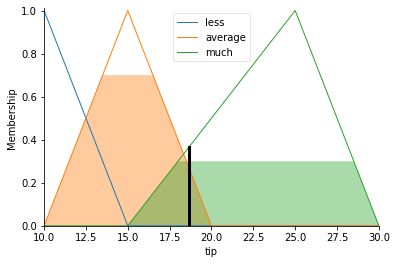

In [19]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

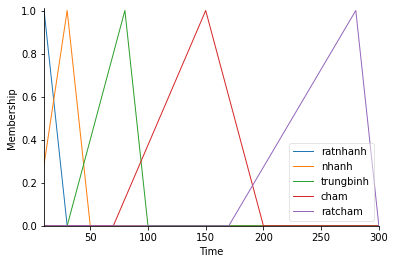

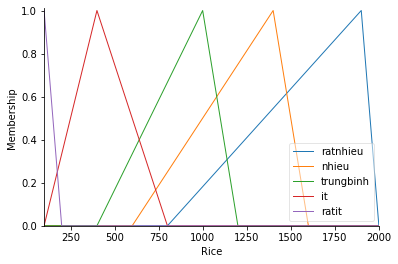

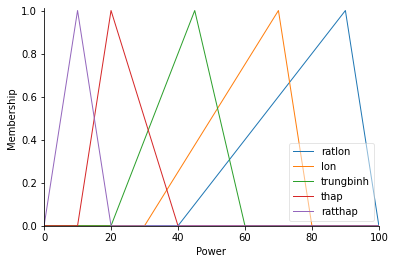

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
time = ctrl.Antecedent(np.arange(10,301,1),'Time')
rice= ctrl.Antecedent(np.arange(100,2010,10),'Rice')
power= ctrl.Consequent(np.arange(0,101,1),'Power')

time['ratnhanh']=fuzz.trimf(time.universe,[0,10,30])
time['nhanh']=fuzz.trimf(time.universe,[2,30,50])
time['trungbinh']=fuzz.trimf(time.universe,[30,80,100])
time['cham']=fuzz.trimf(time.universe,[70,150,200])
time['ratcham']=fuzz.trimf(time.universe,[170,280,300])

rice['ratnhieu']=fuzz.trimf(rice.universe,[800,1900,2000])
rice['nhieu']=fuzz.trimf(rice.universe,[600,1400,1600])
rice['trungbinh']=fuzz.trimf(rice.universe,[400,1000,1200])
rice['it']=fuzz.trimf(rice.universe,[100,400,800])
rice['ratit']=fuzz.trimf(rice.universe,[0,100,200])

power['ratlon']=fuzz.trimf(power.universe,[40,90,100])
power['lon']=fuzz.trimf(power.universe,[30,70,80])
power['trungbinh']=fuzz.trimf(power.universe,[20,45,60])
power['thap']=fuzz.trimf(power.universe,[10,20,40])
power['ratthap']=fuzz.trimf(power.universe,[0,10,20])

time.view()
rice.view()
power.view()




40.551839464882946


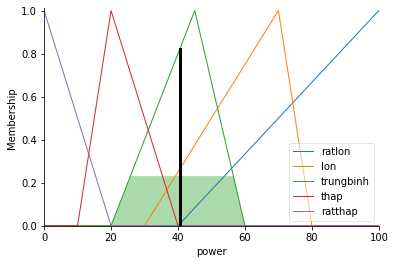

In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice= ctrl.Antecedent(np.arange(100,2001,1),'rice')
power= ctrl.Consequent(np.arange(0,101,1),'power')

time['ratnhanh']=fuzz.trimf(time.universe,[10,10,30])
time['nhanh']=fuzz.trimf(time.universe,[2,30,50])
time['trungbinh']=fuzz.trimf(time.universe,[30,80,100])
time['cham']=fuzz.trimf(time.universe,[70,150,200])
time['ratcham']=fuzz.trimf(time.universe,[170,300,300])

rice['ratnhieu']=fuzz.trimf(rice.universe,[800,2000,2000])
rice['nhieu']=fuzz.trimf(rice.universe,[600,1400,1600])
rice['trungbinh']=fuzz.trimf(rice.universe,[400,1000,1200])
rice['it']=fuzz.trimf(rice.universe,[100,400,800])
rice['ratit']=fuzz.trimf(rice.universe,[100,100,200])

power['ratlon']=fuzz.trimf(power.universe,[40,100,100])
power['lon']=fuzz.trimf(power.universe,[30,70,80])
power['trungbinh']=fuzz.trimf(power.universe,[20,45,60])
power['thap']=fuzz.trimf(power.universe,[10,20,40])
power['ratthap']=fuzz.trimf(power.universe,[0,0,20])


rule1=ctrl.Rule(time['ratnhanh']&rice['ratnhieu'],power['ratlon'])
rule2=ctrl.Rule(time['ratnhanh']&rice['nhieu'],power['ratlon'])
rule3=ctrl.Rule(time['ratnhanh']&rice['trungbinh'],power['lon'])
rule4=ctrl.Rule(time['ratnhanh']&rice['it'],power['lon'])
rule5=ctrl.Rule(time['ratnhanh']&rice['ratit'],power['trungbinh'])

rule6=ctrl.Rule(time['nhanh']&rice['ratnhieu'],power['ratlon'])
rule7=ctrl.Rule(time['nhanh']&rice['nhieu'],power['lon'])
rule8=ctrl.Rule(time['nhanh']&rice['trungbinh'],power['lon'])
rule9=ctrl.Rule(time['nhanh']&rice['it'],power['trungbinh'])
rule10=ctrl.Rule(time['nhanh']&rice['ratit'],power['trungbinh'])

rule11=ctrl.Rule(time['trungbinh']&rice['ratnhieu'],power['lon'])
rule12=ctrl.Rule(time['trungbinh']&rice['nhieu'],power['lon'])
rule13=ctrl.Rule(time['trungbinh']&rice['trungbinh'],power['trungbinh'])
rule14=ctrl.Rule(time['trungbinh']&rice['it'],power['trungbinh'])
rule15=ctrl.Rule(time['trungbinh']&rice['ratit'],power['thap'])

rule16=ctrl.Rule(time['cham']&rice['ratnhieu'],power['trungbinh'])
rule17=ctrl.Rule(time['cham']&rice['nhieu'],power['trungbinh'])
rule18=ctrl.Rule(time['cham']&rice['trungbinh'],power['thap'])
rule19=ctrl.Rule(time['cham']&rice['it'],power['thap'])
rule20=ctrl.Rule(time['cham']&rice['ratit'],power['ratthap'])

rule21=ctrl.Rule(time['ratcham']&rice['ratnhieu'],power['trungbinh'])
rule22=ctrl.Rule(time['ratcham']&rice['nhieu'],power['thap'])
rule23=ctrl.Rule(time['ratcham']&rice['trungbinh'],power['thap'])
rule24=ctrl.Rule(time['ratcham']&rice['it'],power['ratthap'])
rule25=ctrl.Rule(time['ratcham']&rice['ratit'],power['ratthap'])

power_ctrl=ctrl.ControlSystem([rule1,rule2, rule3,rule4,rule5,
                               rule6,rule7,rule8,rule9,rule10,
                               rule11,rule12,rule13,rule13,rule14,rule15,
                               rule16,rule17,rule18,rule19,rule20,rule21,
                               rule22,rule23,rule24,rule25])
CtrlPower = ctrl.ControlSystemSimulation(power_ctrl)
CtrlPower.input['time']=200
CtrlPower.input['rice']=2000
CtrlPower.compute()
print(CtrlPower.output['power'])
power.view(sim=CtrlPower)





